# Customer Analytics - Purchase Descriptive Analysis

Author: Barkamol Urinboev

## Libraries

In [1]:
import numpy as np
import pandas as pd

# To segment our new data
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
# To load our pickled objects
import pickle

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Data Import 

In [2]:
df_purchase = pd.read_csv('purchase data.csv')

## Explore Data

In [3]:
df_purchase.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,0,47,1,110866,1,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,0,47,1,110866,1,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0


In [4]:
# Check for null values 
df_purchase.isnull().sum()

ID                   0
Day                  0
Incidence            0
Brand                0
Quantity             0
Last_Inc_Brand       0
Last_Inc_Quantity    0
Price_1              0
Price_2              0
Price_3              0
Price_4              0
Price_5              0
Promotion_1          0
Promotion_2          0
Promotion_3          0
Promotion_4          0
Promotion_5          0
Sex                  0
Marital status       0
Age                  0
Education            0
Income               0
Occupation           0
Settlement size      0
dtype: int64

## Data Segmentation


### Import Segmentation Model 

In [5]:
scaler = pickle.load(open('scaler.pickle', 'rb'))

In [6]:
pca = pickle.load(open('pca.pickle', 'rb'))

In [7]:
kmeans_pca = pickle.load(open('kmeans_pca.pickle', 'rb'))

### Standardization

In [8]:
# We distinguish important columns
features = df_purchase[['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size']]
df_purchase_segm_std = scaler.transform(features)

### PCA

In [9]:
# Apply pca on the purchase data and obtain 3 principal components 
#  for each row in the table 
df_purchase_segm_pca = pca.transform(df_purchase_segm_std)

### K-means PCA

In [10]:
# Based on the principal components, we use the predict method from pca to 
#  segment the purchase data into the four segments
purchase_segm_kmeans_pca = kmeans_pca.predict(df_purchase_segm_pca)

In [11]:
# Copy resulting data frame as a purchase predictors data frame. 
# Change the predictors data frame, by adding and changing columns.
# Therefore,to keep an original copy.
df_purchase_predictors = df_purchase.copy() 

In [12]:
# Add segment information as a new column in our predictors data frame.
df_purchase_predictors['Segment'] = purchase_segm_kmeans_pca

## Descriptive Analysis by Segment

### Data Analysis by Customer

In [13]:
df_purchase_predictors.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,47,1,110866,1,0,2
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,47,1,110866,1,0,2
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2


In [14]:
# Purchase occasions by customer ID
temp1 = df_purchase_predictors[['ID', "Incidence"]].groupby(['ID'], as_index = False).count()
temp1 = temp1.set_index('ID')
temp1 = temp1.rename(columns = {'Incidence' : 'N_Visits'})
temp1.head()

,N_Visits
ID,
200000001,101
200000002,87
200000003,97
200000004,85
200000005,111


In [15]:
# Number of purchases per customer ID
temp2 = df_purchase_predictors[['ID', 'Incidence']].groupby(['ID'], as_index = False).sum()
temp2 = temp2.set_index('ID')
temp2 = temp2.rename(columns = {'Incidence' : 'N_Purchases'})
temp3 = temp1.join(temp2)
temp3.head()

,N_Visits,N_Purchases
ID,,
200000001,101,9
200000002,87,11
200000003,97,10
200000004,85,11
200000005,111,13


In [16]:
# Average number of purchases by customer ID
temp3['Average_N_Purchase'] = temp3['N_Purchases']/temp3['N_Visits']
temp3.head()

,N_Visits,N_Purchases,Average_N_Purchase
ID,,,
200000001,101,9,0.089109
200000002,87,11,0.126437
200000003,97,10,0.103093
200000004,85,11,0.129412
200000005,111,13,0.117117


In [17]:
# Obtain the segment for each customer in the data set.
temp4 = df_purchase_predictors[['ID', 'Segment']].groupby(['ID'], as_index = False).mean()
temp4 = temp4.set_index('ID')
df_purchase_descr = temp3.join(temp4)
df_purchase_descr['Segment'] = df_purchase_descr['Segment'].astype(int)
df_purchase_descr.head()

,N_Visits,N_Purchases,Average_N_Purchase,Segment
ID,,,,
200000001,101,9,0.089109,2
200000002,87,11,0.126437,3
200000003,97,10,0.103093,2
200000004,85,11,0.129412,2
200000005,111,13,0.117117,1


### Segment Proportions


In [18]:
# Calculate the proportions of each segment and set the appropriate column name. 
segm_prop = df_purchase_descr[['N_Purchases', 'Segment']].groupby(['Segment']).count()/ df_purchase_descr.shape[0]
segm_prop = segm_prop.rename(columns = {'N_Purchases' : 'Segment Proportions'})
segm_prop.head()

,Segment Proportions
Segment,
0,0.206
1,0.220
2,0.378
3,0.196


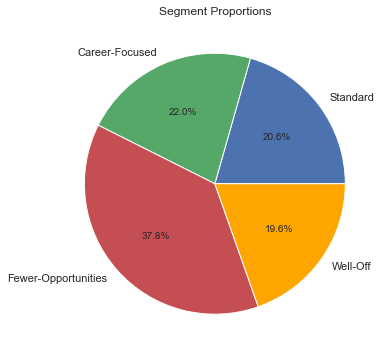

In [19]:
# Plot the segment proportions as a pie chart. 
# Tell which is the largest segment and the relative sizes of each segment.
plt.figure(figsize = (9, 6))
plt.pie(segm_prop['Segment Proportions'],
        labels = ['Standard', 'Career-Focused', 'Fewer-Opportunities', 'Well-Off'],
        autopct = '%1.1f%%', 
        colors = ('b', 'g', 'r', 'orange'))
plt.title('Segment Proportions')
plt.show()

## Purchase Occasion and Purchase Incidence

In [20]:
# Calculate the mean by the four segments. 
# Help us determine the average customer behaivour in each segment.
segments_mean = df_purchase_descr.groupby(['Segment']).mean()
segments_mean



,N_Visits,N_Purchases,Average_N_Purchase
Segment,,,
0,117.699029,24.902913,0.212773
1,123.454545,39.827273,0.283102
2,113.730159,22.756614,0.201588
3,117.295918,34.602041,0.284478


In [21]:
# Calculate the standard deviation by segments. 
# Help us determine how homogoneus each of the segments is.
segments_std = df_purchase_descr.groupby(['Segment']).std()
segments_std 

,N_Visits,N_Purchases,Average_N_Purchase
Segment,,,
0,19.039605,16.774464,0.126603
1,44.864656,53.744530,0.200056
2,16.410498,13.815040,0.120335
3,20.716152,25.900579,0.171787


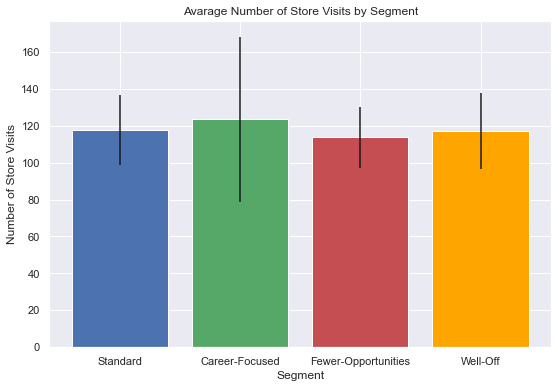

In [22]:
# Plot the average number of store visits for each of the four segments using a bar chart.
# Display the standard deviation as a straight line. 
#   The bigger the length, the higher the standard deviation is.
plt.figure(figsize = (9, 6))
plt.bar(x = (0, 1, 2 ,3),
        tick_label = ('Standard', 'Career-Focused', 'Fewer-Opportunities', 'Well-Off'),
        height = segments_mean['N_Visits'],
       yerr = segments_std['N_Visits'],
       color = ('b', 'g', 'r', 'orange'))
plt.xlabel('Segment')
plt.ylabel('Number of Store Visits')
plt.title('Avarage Number of Store Visits by Segment')
plt.show()

#### 🔶 Insights
The standard deviation amongst customers from the second segment is quite high.
This implies that the customers in this segment are at least homogenous that is least alike when it comes to how often they visit the grocery store

The `standard`,`fewer opportunities` and `well-off` clusters are very similar in terms of their average store purchases.
This is welcome information because it would make them more comparable with respect to our future analysis!

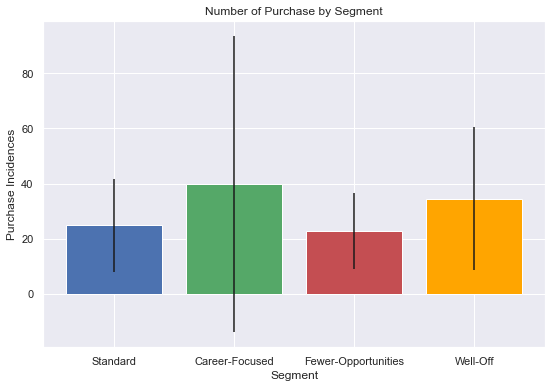

In [23]:
# Display the average number of purchases by segments. 
# Help us understand how often each group buys chocholate candy bars.
plt.figure(figsize = (9, 6))
plt.bar(x = (0, 1, 2 ,3),
        tick_label = ('Standard', 'Career-Focused', 'Fewer-Opportunities', 'Well-Off'),
        height = segments_mean['N_Purchases'],
       yerr = segments_std['N_Purchases'],
       color = ('b', 'g', 'r', 'orange'))
plt.xlabel('Segment')
plt.ylabel('Purchase Incidences')
plt.title('Number of Purchase by Segment')
plt.show()

#### 🔶 Insights
- For `Career-focused`, standard deviation is the highest it might be that a part of the segment buys products very frequently.And another part less so. Although consumers in this segment have a somewhat similar income, the way that they might want to spend their money might differ.

- The most homogenous segment appears to be that of the `Fewer-Opportunities`. This is signified by the segment having the lowest standard deviation or shortest vertical line. The standard segment seems consistent as well with about 25 average purchases and a standard deviation of 30.

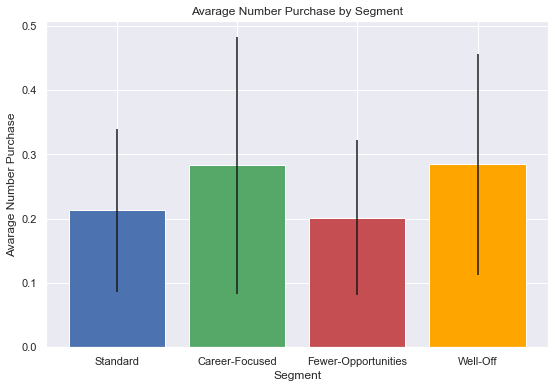

In [24]:
plt.figure(figsize = (9, 6))
plt.bar(x = (0, 1, 2 ,3),
        tick_label = ('Standard', 'Career-Focused', 'Fewer-Opportunities', 'Well-Off'),
        height = segments_mean['Average_N_Purchase'],
        yerr = segments_std['Average_N_Purchase'],
        color = ('b', 'g', 'r', 'orange'))
plt.xlabel('Segment')
plt.ylabel('Avarage Number Purchase')
plt.title('Avarage Number Purchase by Segment')
plt.show()

#### 🔶 Insights
- For `Career-focused` and `Well-Off` standard deviation is the highest it might be that a part of the segment avarage buys products very frequently.And another part less so. Although consumers in this segment have a somewhat similar income, the way that they might want to spend their money might differ.

- The most homogenous segment appears to be that of the `Fewer-Opportunities`. This is signified by the segment having the lowest standard deviation or shortest vertical line. The standard segment seems consistent as well with about 20 average purchases and a standard deviation of 31.

## Brand Choice

In [26]:
# Select only rows where incidence is one. 
# Only interested in the times a purchase was made.
df_purchase_incidence = df_purchase_predictors[df_purchase_predictors['Incidence'] == 1]

In [27]:
# Make dummies for each of the five brands.
brand_dummies = pd.get_dummies(df_purchase_incidence['Brand'], prefix = 'Brand', prefix_sep = '_')
brand_dummies['Segment'], brand_dummies['ID'] = df_purchase_incidence['Segment'], df_purchase['ID']
brand_dummies

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,Segment,ID
6,0,1,0,0,0,2,200000001
11,0,0,0,0,1,2,200000001
19,1,0,0,0,0,2,200000001
24,0,0,0,1,0,2,200000001
29,0,1,0,0,0,2,200000001
...,...,...,...,...,...,...,...
58621,0,1,0,0,0,2,200000500
58648,1,0,0,0,0,2,200000500
58674,0,1,0,0,0,2,200000500
58687,0,1,0,0,0,2,200000500


In [28]:
temp = brand_dummies.groupby(['ID'], as_index = True).mean()
mean_brand_choice = temp.groupby(['Segment'], as_index = True).mean()

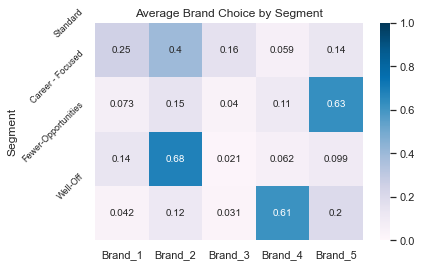

In [29]:
sns.heatmap(mean_brand_choice,
            vmin = 0,
            vmax = 1,
           cmap = 'PuBu',
           annot = True)
plt.yticks([0,1,2,3], ['Standard', 'Career - Focused', 'Fewer-Opportunities', 'Well-Off'], rotation = 45, fontsize = 9)
plt.title('Average Brand Choice by Segment')
plt.show()

## Revenue

In [30]:
# Compute the revenue for brand 1.
# For each entry where Brand 1 was purchased, 
# Multiply the price of the brand for that particular day by the quantity of the product purchased.
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 1]
temp.loc[:,'Revenue Brand 1'] = temp['Price_1'] * temp['Quantity']
segments_brand_revenue = pd.DataFrame()
segments_brand_revenue[['Segment', 'Revenue Brand 1']] = \
temp[['Segment', 'Revenue Brand 1']].groupby(['Segment'], as_index = False).sum()

# Compute the revenue for brand 2.
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 2]
temp.loc[:,'Revenue Brand 2'] = temp['Price_2'] * temp['Quantity']
segments_brand_revenue[['Segment', 'Revenue Brand 2']] = \
temp[['Segment', 'Revenue Brand 2']].groupby(['Segment'], as_index = False).sum()

# Compute the revenue for brand 3.
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 3]
temp.loc[:,'Revenue Brand 3'] = temp['Price_3'] * temp['Quantity']
segments_brand_revenue[['Segment', 'Revenue Brand 3']] = \
temp[['Segment', 'Revenue Brand 3']].groupby(['Segment'], as_index = False).sum()

# Compute the revenue for brand 4.
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 4]
temp.loc[:,'Revenue Brand 4'] = temp['Price_4'] * temp['Quantity']
segments_brand_revenue[['Segment', 'Revenue Brand 4']] = \
temp[['Segment', 'Revenue Brand 4']].groupby(['Segment'], as_index = False).sum()

# Compute the revenue for brand 5.
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 5]
temp.loc[:,'Revenue Brand 5'] = temp['Price_5'] * temp['Quantity']
segments_brand_revenue[['Segment','Revenue Brand 5']] = \
temp[['Segment', 'Revenue Brand 5']].groupby(['Segment'], as_index = False).sum()

C:\Users\barka\AppData\Local\Temp\ipykernel_28700\893762937.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.loc[:,'Revenue Brand 1'] = temp['Price_1'] * temp['Quantity']
C:\Users\barka\AppData\Local\Temp\ipykernel_28700\893762937.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.loc[:,'Revenue Brand 2'] = temp['Price_2'] * temp['Quantity']
C:\Users\barka\AppData\Local\Temp\ipykernel_28700\893762937.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [31]:
# Compute the total revenue for each of the segments. 
# Sum the revenue for each of the five brands.
segments_brand_revenue['Total Revenue'] = (segments_brand_revenue['Revenue Brand 1'] +
                                           segments_brand_revenue['Revenue Brand 2'] +
                                           
                                           segments_brand_revenue['Revenue Brand 3'] +
                                           segments_brand_revenue['Revenue Brand 4'] +
                                           segments_brand_revenue['Revenue Brand 5'] )
segments_brand_revenue

,Segment,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5,Total Revenue
0,0,2611.19,4768.52,3909.17,861.38,2439.75,14590.01
1,1,736.09,1746.42,664.75,2363.84,19441.06,24952.16
2,2,2258.90,13955.14,716.25,1629.31,2230.50,20790.10
3,3,699.47,1298.23,731.35,14185.57,5509.69,22424.31


In [32]:
# Include the segment proportions. 
# See the size of the segment compared to the revenue they bring.
# Add the labels for the segmentssegments_brand_revenue['Segment Proportions'] = segm_prop['Segment Proportions']
segments_brand_revenue['Segment'] = segments_brand_revenue['Segment'].map({0:'Standard',
                                                                           1:'Career-Focused',
                                                                           2:'Fewer-Opportunities',
                                                                           3:'Well-Off'})
segments_brand_revenue = segments_brand_revenue.set_index(['Segment'])
segments_brand_revenue

,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5,Total Revenue,Segment Proportions
Segment,,,,,,,
Standard,2611.19,4768.52,3909.17,861.38,2439.75,14590.01,0.206
Career-Focused,736.09,1746.42,664.75,2363.84,19441.06,24952.16,0.220
Fewer-Opportunities,2258.90,13955.14,716.25,1629.31,2230.50,20790.10,0.378
Well-Off,699.47,1298.23,731.35,14185.57,5509.69,22424.31,0.196


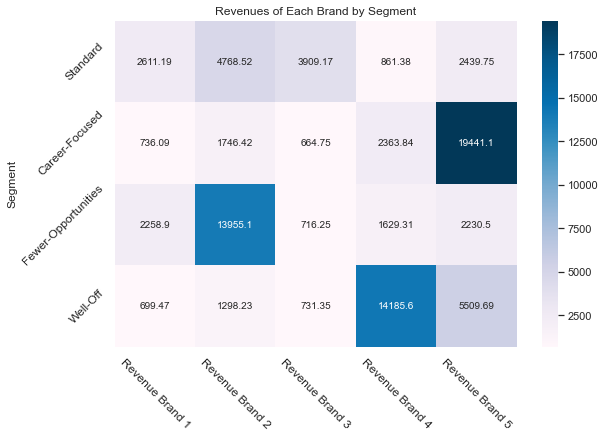

In [33]:
plt.figure(figsize = (9, 6))
sns.heatmap(segments_brand_revenue.iloc[:,:5],
            cmap = 'PuBu',
            annot = True,
           fmt='g')
plt.yticks(rotation = 45, fontsize = 12)
plt.xticks(rotation = -45, fontsize = 12)
plt.title('Revenues of Each Brand by Segment')
plt.show()

#### 🔶 Insights

- Brand 3 does not have any segment as its loyal customers. If brand 3 reduces its price, the standard segment could pivot towards it since they seem to be struggling between brand 3 and brand 2.
- Well-off segments mostly prefer brand 4, followed by brand 5. They seem to be not affected by price. Therefore, brand 4 could cautiously try to increase its price. (hypothesis here: will retain most of the customers and increase the revenue per sale)
- Likewise, for career-focused, Brand 5 could increase its price.

Text(0.5, 0, 'Segment Proportions')

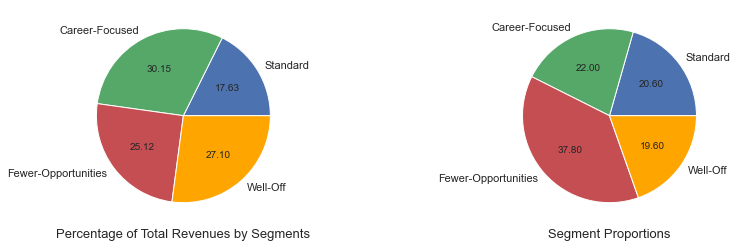

In [34]:
# Create two piecharts 
fig, axs = plt.subplots(1, 2, figsize = (14, 4))

axs[0].pie(segments_brand_revenue['Total Revenue'],
        labels = ['Standard', 'Career-Focused', 'Fewer-Opportunities','Well-Off'],
        autopct='%.2f',
        colors = ('b', 'g', 'r', 'orange'))
axs[0].set_xlabel('Percentage of Total Revenues by Segments',fontsize=13)

axs[1].pie(segments_brand_revenue['Segment Proportions'],
        labels = ['Standard', 'Career-Focused', 'Fewer-Opportunities','Well-Off'],
        autopct='%.2f',
        colors = ('b', 'g', 'r', 'orange'))
axs[1].set_xlabel('Segment Proportions', fontsize=13)

#### 🔶 Insights 

- Career-focused brings the highest revenue although they are far from the biggest standard segment by total number of purchases
- Well-off brings the second highest revenue even though they are the smallest segment 
- Standard contributes the least though they are not the smallest segment because they tend to buy low-priced products